In [2]:
import pandas as pd

In [3]:
raw = pd.read_pickle('sentiment.pickle')
raw

,날짜,제목,본문,산업,sentiment_score
26,2025-12-01,"이어지는 건설업 규제·처벌 강화…""사후 규제영향평가 도입해야""",최근 국회에서 규제와 처벌 강화를 골자로 하는 건설산업 관련 법안을 대거 입법하는 ...,건설,0.390355
33,2025-12-01,유럽 흐르는 제네시스 마그마… 고성능 브랜드로 뜨겁게 경쟁,출범 10년을 맞은 제네시스가 '마그마'를 앞세워 유럽시장 공략에 나선다. 고성능 ...,자동차,0.980447
35,2025-12-01,"'닥터나우 방지법' 처리 임박… 벤처업계 ""혁신 족쇄"" 호소",일명 '닥터나우 방지법'(약사법 개정안)이 12월2일 국회 본회의에서 처리될 전망이...,헬스케어,0.869161
64,2025-12-01,"[백상논단] 생명공학기술, 철저한 검증과 관리 필요하다",[서울경제] 자기 자손은 유전적으로 완벽해 건강하게 장수하기를 바라는 마음은 모든...,헬스케어,0.848842
85,2025-12-01,5년 만에 10배 ‘폭풍성장’ 테슬라...“수입차 점유율 사상 첫 20% 돌파 전망”,[파이낸셜뉴스] 테슬라의 누적 판매 대수가 5년 만에 10배 가까이 늘어나는 등 국...,자동차,0.967868
...,...,...,...,...,...
81317,2025-12-21,압구정4구역 재건축 분양가 '국평 35억8천만원'... 290㎡ 펜트하우스는 211억,서울 핵심 재건축 단지인 '압구정4구역'의 펜트하우스(전용 290㎡) 조합원 분담금...,건설,0.601551
81432,2025-12-21,[AI헬스케어] 정부 주도 AI의료 기술 개발...닥터앤서3.0 참여 기업은,[이데일리 김승권 기자] 정부 주도 의료 인공지능(AI) 사업 ‘닥터앤서’가 3.0...,헬스케어,0.882646
81495,2025-12-21,살 뺄 때만 먹는 줄 알았는데…알고보니 '완전식품'인 고구마의 놀라운 효능 [건강UP],[서울경제] 몸·마음·생활… 무분별한 정보는 많고 건강해야 할 곳도 많습니다. ...,헬스케어,0.980757
81512,2025-12-21,[미리보는 이데일리 신문]차세대 비만약 핵심기술 K바이오가 장악,[이데일리 박지애 기자] 다음은 22일자 이데일리 신문 주요 기사다. △1면 -...,헬스케어,0.364674


In [16]:
# 자동차
sent_auto = raw[raw['산업']=='자동차']
# sent_car

#날짜별 sentiment 평균내기
sent_auto_ave = sent_auto.groupby('날짜')['sentiment_score'].mean()
sent_auto_ave

# 날짜별 기사 수 
sent_auto_amount =  sent_auto.groupby('날짜')['본문'].count()
sent_auto_amount.columns = ['날짜', 'Article_Count']

# to df
sent_auto_ave = sent_auto_ave.reset_index()
sent_auto_ave.columns = ['날짜', 'Ave_sentiment']

#merge
sent_auto_final = pd.merge(sent_auto_ave, sent_auto_amount, on='날짜')
sent_auto_final

,날짜,Ave_sentiment,본문
0,2025-12-01,0.856483,327
1,2025-12-02,0.786420,258
2,2025-12-03,0.828320,257
3,2025-12-04,0.862157,360
4,2025-12-05,0.866582,189
5,2025-12-06,0.586151,26
6,2025-12-07,0.849204,60
7,2025-12-08,0.820588,277
8,2025-12-09,0.821185,243
9,2025-12-10,0.819067,222


In [18]:
# 건설
sent_const = raw[raw['산업']=='건설']
# sent_const

#날짜별 sentiment 평균내기
sent_const_ave = sent_const.groupby('날짜')['sentiment_score'].mean()
# sent_const_ave

# 날짜별 기사 수 
sent_const_amount =  sent_const.groupby('날짜')['본문'].count()
sent_const_amount.columns = ['날짜', 'Article_Count']

# to df
sent_const_ave = sent_const_ave.reset_index()
sent_const_ave.columns = ['날짜', 'Ave_sentiment']
sent_const_ave

#merge
sent_const_final = pd.merge(sent_const_ave, sent_const_amount, on='날짜')
sent_const_final

,날짜,Ave_sentiment,본문
0,2025-12-01,0.771734,199
1,2025-12-02,0.751509,95
2,2025-12-03,0.762538,126
3,2025-12-04,0.844204,116
4,2025-12-05,0.757983,73
5,2025-12-06,0.914579,8
6,2025-12-07,0.856115,24
7,2025-12-08,0.829291,91
8,2025-12-09,0.802617,131
9,2025-12-10,0.708807,99


In [19]:
# 헬스케어
sent_health = raw[raw['산업']=='헬스케어']
sent_health

#날짜별 sentiment 평균내기
sent_health_ave = sent_health.groupby('날짜')['sentiment_score'].mean()
sent_health_ave

# 날짜별 기사 수 
sent_health_amount =  sent_health.groupby('날짜')['본문'].count()
sent_health_amount.columns = ['날짜', 'Article_Count']

# to df
sent_health_ave = sent_health_ave.reset_index()
sent_health_ave.columns = ['날짜', 'Ave_sentiment']
sent_health_ave

#merge
sent_health_final = pd.merge(sent_health_ave, sent_health_amount, on='날짜')
sent_health_final

,날짜,Ave_sentiment,본문
0,2025-12-01,0.854711,266
1,2025-12-02,0.851713,211
2,2025-12-03,0.862051,209
3,2025-12-04,0.826660,246
4,2025-12-05,0.811210,211
5,2025-12-06,0.487228,34
6,2025-12-07,0.811675,49
7,2025-12-08,0.837116,263
8,2025-12-09,0.834222,256
9,2025-12-10,0.821176,224


In [21]:
sent_health_final['industry'] = 'Healthcare'
sent_auto_final['industry'] = 'Automotive'
sent_const_final['industry'] = 'Construction'

total_sent = pd.concat([sent_health_final, sent_auto_final, sent_const_final])
total_sent

,날짜,Ave_sentiment,본문,industry
0,2025-12-01,0.854711,266,Healthcare
1,2025-12-02,0.851713,211,Healthcare
2,2025-12-03,0.862051,209,Healthcare
3,2025-12-04,0.826660,246,Healthcare
4,2025-12-05,0.811210,211,Healthcare
...,...,...,...,...
16,2025-12-17,0.684655,92,Construction
17,2025-12-18,0.600379,157,Construction
18,2025-12-19,0.788852,89,Construction
19,2025-12-20,0.530973,18,Construction


In [22]:
total_sent.to_pickle("daily_sentiment.pickle")

C:\Users\kimjh\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kimjh\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


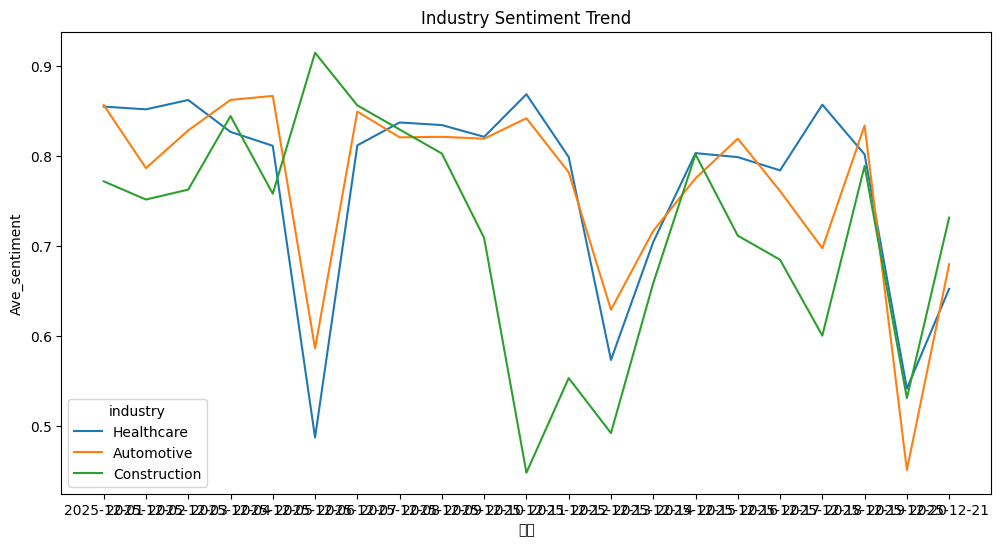

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_sent, x='날짜', y='Ave_sentiment', hue='industry')
plt.title('Industry Sentiment Trend')
plt.show()

C:\Users\kimjh\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kimjh\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kimjh\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kimjh\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


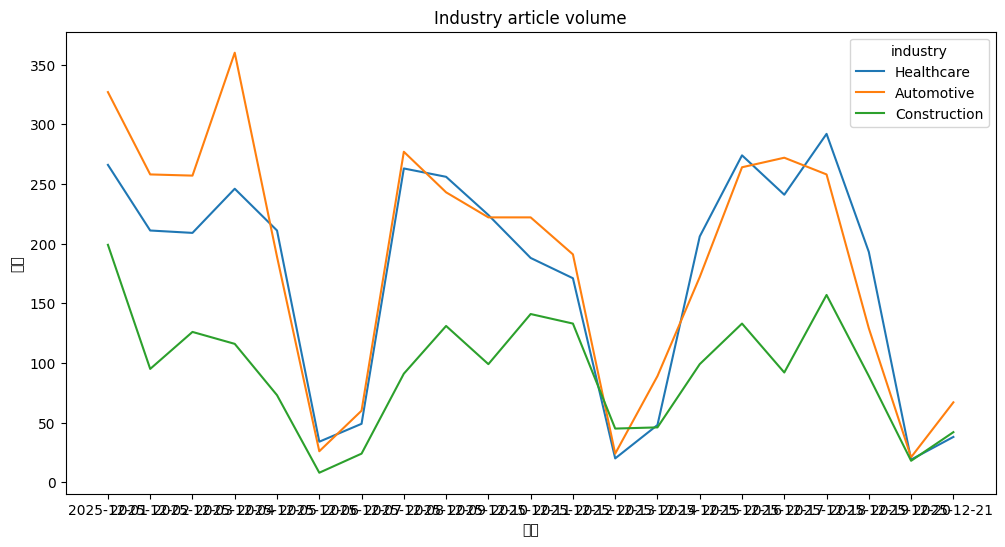

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_sent, x='날짜', y='본문', hue='industry')
plt.title('Industry article volume')
plt.show()

In [ ]:
# 평균으로 기준선 만들기
# 방안 1. 30일치 (현재 30일치가 없으므로 30일치 미만의 경우 전체 평균 내기)

# 방안 2. 15일치

# 기존 수치들을 기준선 대비 어느 정도 튀는지 -1 ~ 1 사이로 normalize 